<h1 align='center' style='color:purple'>Clustering With K Means - Python Tutorial</h1>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


```python
This code reads in a CSV file named "income.csv" using the pandas library and assigns the resulting DataFrame to a variable named "df".

The ".head()" method is then called on this DataFrame to display the first 5 rows of the data in a tabular format. This is a useful way to get a quick look at the structure of the data and check if it has been loaded correctly.
```

Text(0, 0.5, 'Income($)')

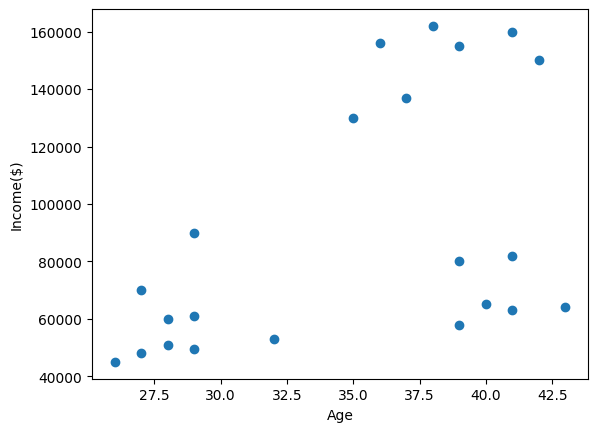

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

```python
This code creates a scatter plot of the "Age" and "Income" columns from the "df" DataFrame using the matplotlib library.

The "plt.scatter()" function takes two arguments - the "Age" column and the "Income" column from the DataFrame. It then plots each data point as a point on the scatter plot.

The "plt.xlabel()" and "plt.ylabel()" functions are then used to add labels to the x-axis and y-axis, respectively.
```

In [4]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

```python
This code uses the KMeans algorithm from the scikit-learn library to cluster the data in the "df" DataFrame based on the "Age" and "Income" columns.

The first line of code initializes a KMeans object "km" with 3 clusters specified by the "n_clusters" parameter.

The second line of code fits the KMeans model to the "Age" and "Income" columns in the DataFrame and predicts the cluster labels for each data point using the "fit_predict()" method.

The third line of code simply displays the predicted cluster labels.
```

In [5]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


```python
This code adds a new column to the "df" DataFrame called "cluster" and assigns the predicted cluster labels to this column.

The first line of code uses square bracket notation to add a new column to the DataFrame and assigns it the values of "y_predicted".

The second line of code displays the first 5 rows of the updated DataFrame using the "head()" method to show the new "cluster" column.
```

In [6]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

```python
This code retrieves the cluster centers from the KMeans model "km".

The "cluster_centers_" attribute of a KMeans object returns the coordinates of the centers of each cluster. In this case, since "km" was fit with 3 clusters, the "cluster_centers_" attribute returns a 2D array with 3 rows (one for each cluster) and 2 columns (one for each feature).
```

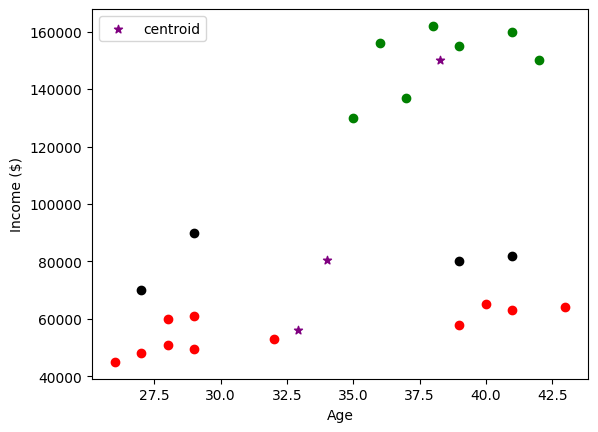

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

```python
This code creates a scatter plot of the data points in the "df" DataFrame, color-coded by the predicted cluster labels.

The first three lines of code create new DataFrames "df1", "df2", and "df3" that contain only the data points belonging to clusters 0, 1, and 2, respectively.

The next three lines of code create scatter plots of the data points in each cluster using a different color for each cluster. The coordinates for the x-axis and y-axis are the "Age" and "Income" columns from the DataFrame.

The seventh line of code adds purple-colored stars at the coordinates of the cluster centers, which were retrieved from the "km" object.

The last three lines of code add labels to the x-axis and y-axis and create a legend for the plot
```

```
From the scatter plot, it is clear that the "Age" and "Income" ranges are quite different. This can lead to incorrect clustering results since the algorithm may be more influenced by the feature with the larger range. To obtain better results, it is usually a good idea to preprocess and normalize the data so that all features have similar ranges. This can be achieved using techniques such as MinMax scaling or Standard scaling. After normalizing the data, we can then perform clustering on the preprocessed data to obtain better results.
```

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

```python
This code normalizes the "Age" and "Income" columns in the "df" DataFrame using MinMax scaling.

The first line creates an instance of the MinMaxScaler object.

The second line fits the scaler object to the "Income" column of the "df" DataFrame, so that the scaler can learn the minimum and maximum values of the "Income" column.

The third line applies the scaling transformation to the "Income" column of the "df" DataFrame, so that the "Income" column is now scaled to the range [0, 1].

The fourth line fits the scaler object to the "Age" column of the "df" DataFrame, so that the scaler can learn the minimum and maximum values of the "Age" column.

The fifth line applies the scaling transformation to the "Age" column of the "df" DataFrame, so that the "Age" column is also scaled to the range [0, 1].

By scaling the data, we ensure that both "Age" and "Income" columns are on the same scale and have similar ranges. This can help improve the clustering results.
```

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


```
After normalizing the "Age" and "Income" columns, the code df.head() will show the first five rows of the updated DataFrame "df" with the scaled "Age" and "Income" columns.
 ```

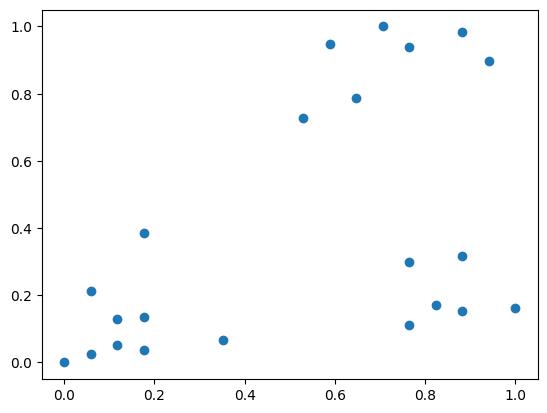

In [10]:
plt.scatter(df.Age,df['Income($)'])

In [11]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

```python
This code performs k-means clustering on the preprocessed DataFrame "df" using the KMeans algorithm from the scikit-learn library.

The first line creates an instance of the KMeans object with "n_clusters=3", which specifies the number of clusters to form.

The second line fits the KMeans object to the preprocessed DataFrame "df" with "Age" and "Income" columns using the "fit_predict()" method. This method computes cluster centers and assigns each sample in the input data to a cluster.

The resulting "y_predicted" array contains the predicted cluster assignments for each sample in the input data.
```

In [12]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


```python
This code updates the "df" DataFrame with a new "cluster" column that contains the predicted cluster assignments for each sample in the input data.

The first line adds a new column "cluster" to the "df" DataFrame.

The second line assigns the "y_predicted" array to the "cluster" column of the "df" DataFrame.

The third line shows the first five rows of the updated DataFrame "df" with the "cluster" column.
```

In [13]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

```python
This code returns the coordinates of the centroids for each of the clusters generated by the KMeans algorithm.

The km.cluster_centers_ attribute is an array containing the coordinates of the cluster centers. Each row of the array corresponds to a cluster center, and the columns represent the feature values for each center.
```

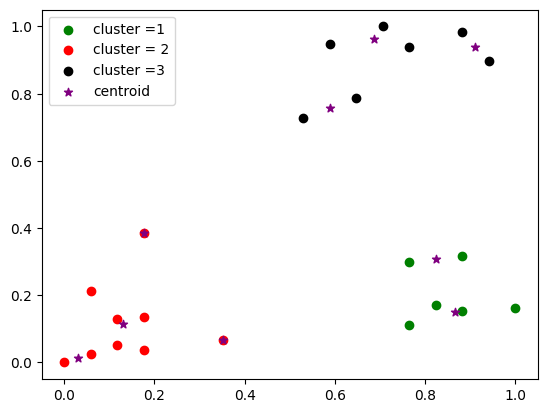

In [18]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green',label='cluster =1')
plt.scatter(df2.Age,df2['Income($)'],color='red', label='cluster = 2')
plt.scatter(df3.Age,df3['Income($)'],color='black', label='cluster =3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

```python
This code is creating a scatter plot to visualize the clusters and their centroids after normalizing the features.

The code first creates three dataframes (df1, df2, and df3) for each of the clusters based on the cluster labels assigned by the KMeans algorithm.

Then, the code uses plt.scatter() to create a scatter plot of each cluster's data points, with each cluster represented by a different color. The code also plots the coordinates of the centroids for each cluster as purple stars.

The plt.scatter() function takes three arguments: the x-axis data, the y-axis data, and the color of the data points. The label parameter is used to create a legend for each cluster.
```

<h4 style='color:purple'>Elbow Plot</h4>

```python
The elbow method is a way to determine the optimal number of clusters (k) for KMeans clustering. The basic idea behind the elbow method is to run the KMeans algorithm on the dataset for a range of values of k and calculate the sum of squared distances between the data points and their assigned centroids for each value of k. The sum of squared distances is also called the Within Cluster Sum of Squares (WCSS).

The WCSS measures the compactness of the clustering, or in other words, how well the data points are clustered together. As k increases, the WCSS tends to decrease, because with more clusters, the data points can be assigned to clusters that are closer to them. However, as k continues to increase, the improvement in WCSS becomes less significant, because the addition of each new cluster will only reduce the WCSS by a small amount.

The "elbow" in the plot is the point of inflection where the rate of decrease in WCSS slows down significantly. This point represents the optimal number of clusters, because adding more clusters beyond this point does not provide significant improvement in clustering performance.
```

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In the given code, we first initialize an empty list called sse to store the WCSS values for each value of k. We then iterate over a range of k values from 1 to 9, and for each value of k, we initialize the KMeans algorithm with that value of k, fit the model on our dataset, and calculate the WCSS. We append the WCSS value to the sse list for each value of k.

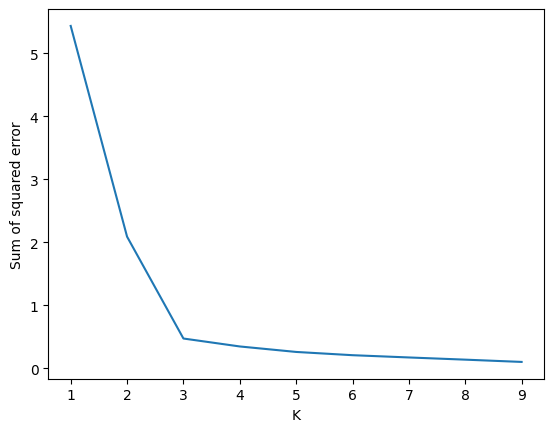

In [16]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

```python
After calculating the WCSS for each value of k using the KMeans algorithm, we can plot the curve between WCSS and the number of clusters (k) to visualize the Elbow plot.

In the given code, we use Matplotlib to create a line plot of the WCSS values for each value of k. We set the x-axis label to "K" and the y-axis label to "Sum of squared error". We then plot the line plot between the k values and the WCSS values using the plot() function from Matplotlib.
```